In [36]:
# Library Installation

import pandas as pd
import matplotlib.pyplot as plt

In [37]:
my_ts = pd.date_range(start = '2026-02-01', periods = 7, freq = 'D')

for day in my_ts:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [38]:
# creating Month date range

my_ts_2 = pd.date_range(start = '2026-01-01', periods = 12, freq = "ME")

for month in my_ts_2:
    print(month.days_in_month, month.month_name())

31 January
28 February
31 March
30 April
31 May
30 June
31 July
31 August
30 September
31 October
30 November
31 December


In [39]:
# creating Business Day date range

my_ts_3 = pd.date_range(start = '2026-02-01', periods = 20, freq = "B")

for day in my_ts_3:
    print(day.dayofweek, day.day_name(), day.date())

0 Monday 2026-02-02
1 Tuesday 2026-02-03
2 Wednesday 2026-02-04
3 Thursday 2026-02-05
4 Friday 2026-02-06
0 Monday 2026-02-09
1 Tuesday 2026-02-10
2 Wednesday 2026-02-11
3 Thursday 2026-02-12
4 Friday 2026-02-13
0 Monday 2026-02-16
1 Tuesday 2026-02-17
2 Wednesday 2026-02-18
3 Thursday 2026-02-19
4 Friday 2026-02-20
0 Monday 2026-02-23
1 Tuesday 2026-02-24
2 Wednesday 2026-02-25
3 Thursday 2026-02-26
4 Friday 2026-02-27


Indexing & resampling time series

In [40]:
nyc_df = pd.read_csv('data/nyc.csv')

nyc_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6317 non-null   int64  
 1   date        6317 non-null   str    
 2   ozone       6317 non-null   float64
 3   pm25        6317 non-null   float64
 4   co          6317 non-null   float64
dtypes: float64(3), int64(1), str(1)
memory usage: 246.9 KB


In [41]:
# changing the str date col to datetime64 format
nyc_df.date = pd.to_datetime(nyc_df.date)

nyc_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  6317 non-null   int64         
 1   date        6317 non-null   datetime64[us]
 2   ozone       6317 non-null   float64       
 3   pm25        6317 non-null   float64       
 4   co          6317 non-null   float64       
dtypes: datetime64[us](1), float64(3), int64(1)
memory usage: 246.9 KB


In [42]:
# set date col as index

nyc_df.set_index('date', inplace= True)
nyc_df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6317 non-null   int64  
 1   ozone       6317 non-null   float64
 2   pm25        6317 non-null   float64
 3   co          6317 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 246.8 KB


In [43]:
nyc_df.drop(columns=['Unnamed: 0'], inplace = True)
nyc_df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB


In [44]:
nyc_df.head()

,ozone,pm25,co
date,,,
1999-07-01,0.012024,20.000000,1.300686
1999-07-02,0.027699,23.900000,0.958194
1999-07-03,0.043969,36.700000,1.194444
1999-07-04,0.035161,39.000000,1.081548
1999-07-05,0.038359,28.171429,0.939583


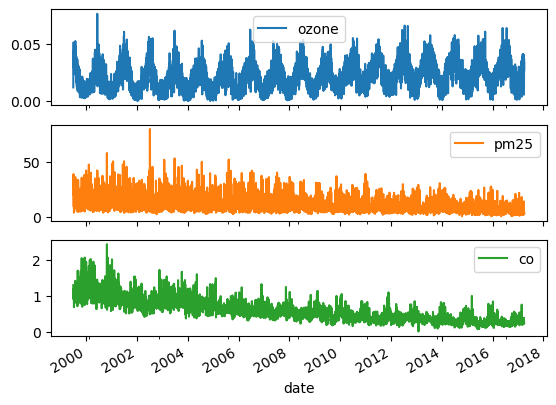

In [45]:
nyc_df.plot(subplots= True)
plt.savefig('output/nyc_df_subplot.png')
plt.show()